# KNN Classification and Logistic Regression to classify glass types

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset = pd.read_csv("glass.csv") # importing the data from the .csv file
dataset.sort_values('Al', inplace=True) # sort by ascending "Al" values
dataset.head() # print the first 5 rows

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


In [25]:
def euclidean(a,b):
    if len(a) != len(b):
        return "Lengths are unequal"
    else:
        tot = 0
    for i in range(len(a)):
        tot += (b[i] - a[i])**2
    ans = np.sqrt(tot)
    return ans
    
#ans = euclidean([3,4,4],[0,0])
#print(ans)

#feed one point which is an array, and data which is a matrix with one row per data point and one column per attribute
def distance(p, data, D):
    values = []
    text = ""
    for i in range(len(data)):
        if len(data[i]) != len(p):
            text = "Lengths are unequal for point"+str(i+1)
            return text
        elif (len(data[i]) != D) or (len(p) != D):
            text = "D metric is different for point"+str(i+1)
            return text
        else:
            values.append([euclidean(p,data[i]),i]) #returns the Euclidean distance and index to data point i
        values = sorted(values)
    return values

p = [1,2,3,4]
data = [[0,2,0,0],[0,0,0,1],[4,0,0,0],[0,0,0,0]]

ans = distance(p, data, 4)
print(ans)
#print(np.column_stack([p,data])) 

[[4.795831523312719, 1], [5.0990195135927845, 0], [5.477225575051661, 3], [6.164414002968976, 2]]


Split the data into training and test data:

In [26]:
training_data = dataset.sample(frac = 0.8)
test_data = dataset.sample(frac = 0.2)

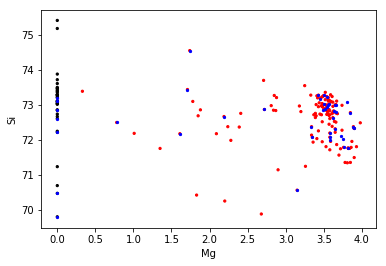

*******TRAINING*******
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
125  1.51872  12.93  3.66  1.56  72.51  0.58   8.55  0.00  0.12     2
97   1.51743  12.20  3.25  1.16  73.55  0.62   8.90  0.00  0.24     2
159  1.51796  13.50  3.36  1.63  71.94  0.57   8.81  0.00  0.09     3
154  1.51694  12.86  3.58  1.31  72.61  0.61   8.79  0.00  0.00     3
144  1.51660  12.99  3.18  1.23  72.97  0.58   8.81  0.00  0.24     2
101  1.51730  12.35  2.72  1.63  72.87  0.70   9.23  0.00  0.00     2
88   1.51618  13.01  3.50  1.48  72.89  0.60   8.12  0.00  0.00     2
57   1.51824  12.87  3.48  1.29  72.95  0.60   8.43  0.00  0.00     1
12   1.51589  12.88  3.43  1.40  73.28  0.69   8.05  0.00  0.24     1
137  1.51711  12.89  3.62  1.57  72.96  0.61   8.11  0.00  0.00     2
42   1.51779  13.21  3.39  1.33  72.76  0.59   8.59  0.00  0.00     1
28   1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00     1
204  1.51617  14.95  0.00  2.27  73.30  0.00   8.71  0.67  0.00    

In [27]:
import matplotlib.pyplot as plt

colors = np.where(training_data["Mg"]==0,'k','r')
ax1 = training_data.plot.scatter("Mg","Si",5, c=colors)
ax2 = test_data.plot.scatter("Mg", "Si", 5, 'b', ax=ax1)
plt.show()

print("*******TRAINING*******")
print(training_data)
print("*******TEST*******")
print(test_data)

Write a function ```knn_search(p, trainingset, k)``` that returns the indices of the ```k``` closest neighbours around the point ```p```, use the ```distance``` function implemented in previous task!

In [28]:
def knn_search(p, trainingset, k):
    data = distance(p, trainingset, len(p))
    indices = []
    distances = []
    for dist in data:
        indices.append(dist[1])
        distances.append(dist[0])
    return indices[0:k]

p = [1,2,3,4]
data = [[0,2,0,0],[0,0,0,1],[4,0,0,0],[0,0,0,0]]

ans = knn_search(p,data,4)
print(ans)

[1, 0, 3, 2]


## 2. Implementation of logistic regression

In order to begin, use matplotlib and numpy to plot the logistic function $\phi(z)$ over a sufficiently long range of $z$-values to showcase its behaviour. $$\phi(z) = \frac{1}{1 + exp(-z)}$$
    

[-8.         -7.67346939 -7.34693878 -7.02040816 -6.69387755 -6.36734694
 -6.04081633 -5.71428571 -5.3877551  -5.06122449 -4.73469388 -4.40816327
 -4.08163265 -3.75510204 -3.42857143 -3.10204082 -2.7755102  -2.44897959
 -2.12244898 -1.79591837 -1.46938776 -1.14285714 -0.81632653 -0.48979592
 -0.16326531  0.16326531  0.48979592  0.81632653  1.14285714  1.46938776
  1.79591837  2.12244898  2.44897959  2.7755102   3.10204082  3.42857143
  3.75510204  4.08163265  4.40816327  4.73469388  5.06122449  5.3877551
  5.71428571  6.04081633  6.36734694  6.69387755  7.02040816  7.34693878
  7.67346939  8.        ]


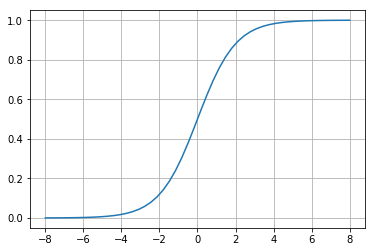

In [29]:
x = np.linspace(-8,8,50)
print(x)
phi = (1)/(1+(np.exp(-x)))

plt.grid()
plt.plot(x,phi)
plt.show()

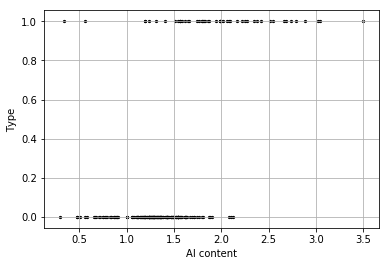

In [30]:
#maps Types 1-3 as 0 and 5-7 as 1
dataset['binary'] = dataset.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
data = np.stack((dataset["Al"], np.full_like(dataset["Al"],1),dataset["binary"]), axis=-1)
#Al is the x value, anything with type 1,2,3 > 0, and type 4,5,6 > 1
df_Al_data = pd.DataFrame(columns = ['Al','const','label'])
df_Al_data['Al'] = dataset["Al"]
df_Al_data['const'] = 1
df_Al_data['label'] = dataset['binary']

plt.grid()
plt.xlabel('Al content')
plt.ylabel('Type')
plt.scatter(df_Al_data['Al'],df_Al_data['label'],5,c='black')

Define now what the features, weights and labels are. It'll make life easier later on:

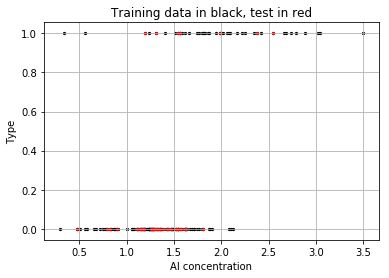

In [31]:
train = np.array(df_Al_data.sample(frac = 0.8))
test = np.array(df_Al_data.sample(frac = 0.2))
    
X_train = train[:,0:2] #notice it's in 2 dimensions
weights = np.transpose([[0.2, 0.5]]) #randomly chosen
Y_train = train[:,[2]] #notice it's in 2 dimensions

X_test =  test[:,0:2]
Y_test = test[:,[2]]

plt.grid()
plt.title("Training data in black, test in red")
plt.ylabel("Type")
plt.xlabel("Al concentration")
plt.scatter(X_train[:,0],Y_train,5,c='black')
plt.scatter(X_test[:,0],Y_test,5,c='red')

Define the sigmoid function. Then define a function that converts features (inputs) and weights into labels (outputs) through the sigmoid function.

In [32]:
def logit(z):
    phi = (1)/(1+(np.exp(-z)))
    return phi

def predict(features,weights):
    z = np.dot(features,weights)
    return logit(z)


Write a ```cost_function``` function to calculate the log loss or 'cost' of the predictions in comparison with the actual labels.

https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_vectorized.png![image.png](attachment:image.png)

In [33]:
def cost_function(features,labels,weights):
    datapoints = len(labels) #2000 datapoints
    '''labels: [2000 1]'''
    '''labels: [2000 1]'''
    '''weights: [2 1]'''
    '''predicted: [2000' 1]'''
    predicted = predict(features,weights) #[2000 1]
    
    #error when label = 1
    cost_1 = -labels*np.log(predicted) #should give [2000 1], 1 number for each data point
    #error when label = 0
    cost_2 = -((1-labels)*np.log(1-predicted)) #again, this isnot matrix multiplication
    
    total_cost = cost_1+cost_2
    average_cost = np.sum(total_cost)/datapoints
    
    return average_cost #average_cost: [1 1]



The good thing about the sigmoid function is that it gives a nice answer when differentiated:
    
    s′(z)=s(z)(1−s(z))

And this means the cost function, when differentiated, leads to this:

    C'=x(s(z)−y)

Write a function to figure out the cost function derivative with respect to the weights, and then update the weights accordingly:

In [34]:
def update_weights(features,labels,weights,learning_rate):
    """ features: [2000 2] (even if the second column is just 1s, for the bias term)
    labels: [2000 1]
    weights: [2 1]"""
    
    predicted = predict(features,weights) #predicted: [2000 1]
    N = len(features)
    
    cost_derivative = np.dot(features.T, (predicted - labels)) #outputs 2 by 1 matrix
    #with the cost derivative with respect to each weight
    """cost_derivative = [2 1]"""
    weights = weights - (cost_derivative/N)*learning_rate
    return weights



In [35]:
def decision_boundary(prob):
    return 1 if prob >= .7 else 0

decision_boundary = np.vectorize(decision_boundary)

def classify(preds):
    return decision_boundary(preds).flatten()


In [36]:
def minimize(features, labels, weights, lr, iters):
    cost_history = []
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
        # Log Progress
        #if i % 1000 == 0:
         #   print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history


In [37]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

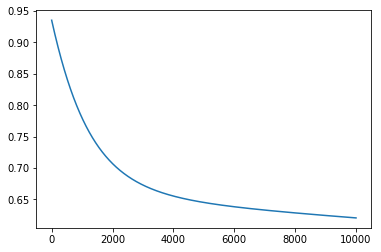

In [38]:
fin_weights, cost_history = minimize(X_train,Y_train,weights,0.0005,10000)
plt.plot(cost_history)


Accuracy:  83.72 %


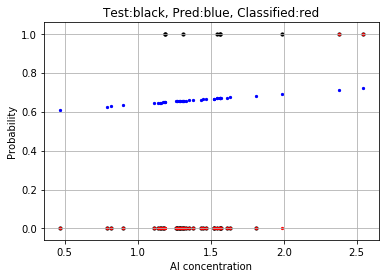

In [39]:

plt.grid()
Y_pred = predict(X_test,-fin_weights)
Y_pred_labs = classify(Y_pred)

plt.title("Test:black, Pred:blue, Classified:red")
plt.xlabel('Al concentration')
plt.ylabel('Probability')

plt.scatter(X_test[:,0],Y_test,10,c='black')
plt.scatter(X_test[:,0],Y_pred,5,c='blue') #should be curved? Couldn't find the error.
plt.scatter(X_test[:,0],Y_pred_labs,5,c='red')

acc = accuracy(Y_pred_labs,Y_test[:,0])
print("Accuracy: ", round((100*acc),2),"%")

# Comparison to scikitlearn implementation

Accuracy:  86.05 %


/Users/arohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

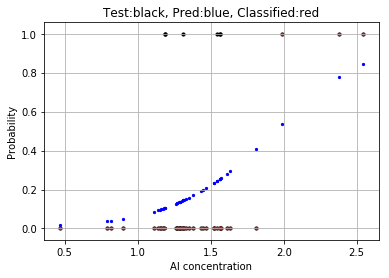

In [80]:
X_train_2D = np.reshape(X_train[:,0],(len(X_train),1))
X_test_2D = np.reshape(X_test[:,0],(len(X_test),1))

model = LogisticRegression(penalty='l2', solver='newton-cg')
model.fit(X_train_2D,Y_train)

Y_pred_sk = model.predict(X_test_2D)
Y_pred_prob = model.predict_proba(X_test_2D)

acc = accuracy(Y_pred_sk,Y_test[:,0])
print("Accuracy: ", round((100*acc),2),"%")

plt.grid()
plt.title("Test:black, Pred:blue, Classified:red")
plt.xlabel('Al concentration')
plt.ylabel('Probability')

plt.scatter(X_test[:,0],Y_test,10,c='black')
plt.scatter(X_test[:,0],Y_pred_prob[:,1],5,c='blue')
plt.scatter(X_test[:,0],Y_pred_sk,5,c='red')
